
# Análise de Dados Estaduais - Goiás (Tarefa 4 - 2023) 🗂️

Notebook específico da Tarefa 4 de 2023, voltado para o estado de Goiás.  
Inclui importação, limpeza e análise descritiva dos dados estaduais, com geração de gráficos e tabelas comparativas.

---


# Análise exploratória completa para um estado do Brasil

Importar pacotes necessários:

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
pd.set_option('display.max_columns', 50)             # permite a visualização de 50 colunas do dataframe
pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais

# parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos dados

Lendo a partir do *google drive*.

In [ ]:
# demora um pouco
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
seg = pd.read_excel("seguro-rural-2023.xlsx")

Mounted at /content/drive


In [ ]:
df = seg.copy()    # fazer cópia do objeto seg em df
df = df.fillna(0)    # substituir nan por 0
df.dropna(inplace=True, how='all')
df.dropna(inplace=True)
df['animal'] = df['animal'].replace(['-', '...', 'X'], 0).astype(int)   # substituir variável 'animal' com '-', '...' e 'X' por 0
# simplificar os tipos de seguro da variável 'tipo'
df['tipo'] = df['tipo'].replace({'CUSTEIO': 'custeio',
                    'PRODUTIVIDADE': 'produtividade',
                    'FLORESTAS': 'florestas',
                    'RECEITA': 'receita',
                    'PECUÁRIO': 'pecuário'})
# simplificar os nomes de eventos preponderantes da variável 'evento'
df['evento'] = df['evento'].replace({'0':'nenhum',
                      'SECA': 'seca',
                      'GEADA': 'geada',
                      'CHUVA EXCESSIVA': 'chuva',
                      'GRANIZO': 'granizo',
                      'VENTOS FORTES/FRIOS': 'vento',
                      'INUNDAÇÃO/TROMBA D´ÁGUA': 'inundação',
                      'VARIAÇÃO EXCESSIVA DE TEMPERATURA': 'temp.',
                      'INCÊNDIO': 'incêndio',
                      'DEMAIS CAUSAS': 'outras',
                      'VARIAÇÃO DE PREÇO': 'var. preço',
                      'REPLANTIO': 'replantio',
                      'RAIO': 'raio',
                      'MORTE': 'morte',
                      'QUEDA DE PARREIRAL': 'queda parr.',
                      'PERDA DE QUALIDADE': 'perda qual.',
                      'DOENÇAS E PRAGAS': 'doenças'})
# categorizar os tipos de culturas (nova coluna)
df['tipo_cultura'] = df['cultura'].replace({'Soja': 'grãos',
                                            'Milho 1ª safra': 'grãos',
                                            'Milho 2ª safra': 'grãos',
                                            'Cana-de-açúcar': 'perenes',
                                            'Trigo': 'grãos',
                                            'Feijão 1ª safra': 'leguminosas',
                                            'Sorgo': 'grãos',
                                            'Café': 'perenes',
                                            'Cevada': 'sementes',
                                            'Batata': 'hortaliças',
                                            'Arroz': 'grãos',
                                            'Aveia': 'grãos',
                                            'Canola': 'grãos',
                                            'Algodão': 'grãos',
                                            'Mandioca': 'hortaliças',
                                            'Feijão 2ª safra': 'leguminosas',
                                            'Amendoim': 'leguminosas',
                                            'Triticale': 'grãos',
                                            'Pecuário': 'perenes',
                                            'Cebola': 'hortaliças',
                                            'Alho': 'hortaliças',
                                            'Melancia': 'frutas',
                                            'Tomate': 'hortaliças',
                                            'Girassol': 'grãos',
                                            'Abóbora': 'hortaliças',
                                            'Atemoia': 'frutas',
                                            'Cenoura': 'hortaliças',
                                            'Couve-flor': 'hortaliças',
                                            'Goiaba': 'frutas',
                                            'Laranja': 'frutas',
                                            'Tangerina': 'frutas',
                                            'Melão': 'frutas',
                                            'Pepino': 'hortaliças',
                                            'Pimentão': 'hortaliças',
                                            'Repolho': 'hortaliças',
                                            'Uva': 'frutas',
                                            'Beterraba': 'hortaliças',
                                            'Ameixa': 'frutas',
                                            'Chuchu': 'hortaliças',
                                            'Kiwi': 'frutas',
                                            'Maracujá': 'frutas',
                                            'Nectarina': 'frutas',
                                            'Pêssego': 'frutas',
                                            'Brócolis': 'hortaliças',
                                            'Pêra': 'frutas',
                                            'Pastagem': 'outros',
                                            'Caqui': 'frutas',
                                            'Maçã': 'frutas',
                                            'Floresta': 'outros',
                                            'Banana': 'frutas',
                                            'Abacate': 'frutas',
                                            'Abobrinha': 'hortaliças',
                                            'Alface': 'hortaliças',
                                            'Vagem': 'hortaliças',
                                            'Cacau': 'frutas',
                                            'Berinjela': 'hortaliças',
                                            'Figo': 'frutas',
                                            'Manga': 'frutas',
                                            'Ervilha': 'leguminosas',
                                            'Mamão': 'frutas',
                                            'Morango': 'frutas',
                                            'Lichia': 'frutas',
                                            'Abacaxi': 'frutas',
                                            'Limão': 'frutas',
                                            'Lima': 'frutas',
                                            'Graviola': 'frutas'})
# reorganizar as colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'tipo_cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
                'taxa', 'subvencao', 'indenizacao', 'evento', 'sinistro',
                'sinistralidade']]

Saving seguro-rural-municipios-2023.xlsx - Sheet1.csv to seguro-rural-municipios-2023.xlsx - Sheet1 (1).csv


<ipython-input-5-6245c6cb2384>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goias_data['indenizacao'] = goias_data['indenizacao'].replace(',', '.', regex=True).astype(float)
<ipython-input-5-6245c6cb2384>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goias_data['premio'] = goias_data['premio'].replace(',', '.', regex=True).astype(float)
<ipython-input-5-6245c6cb2384>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

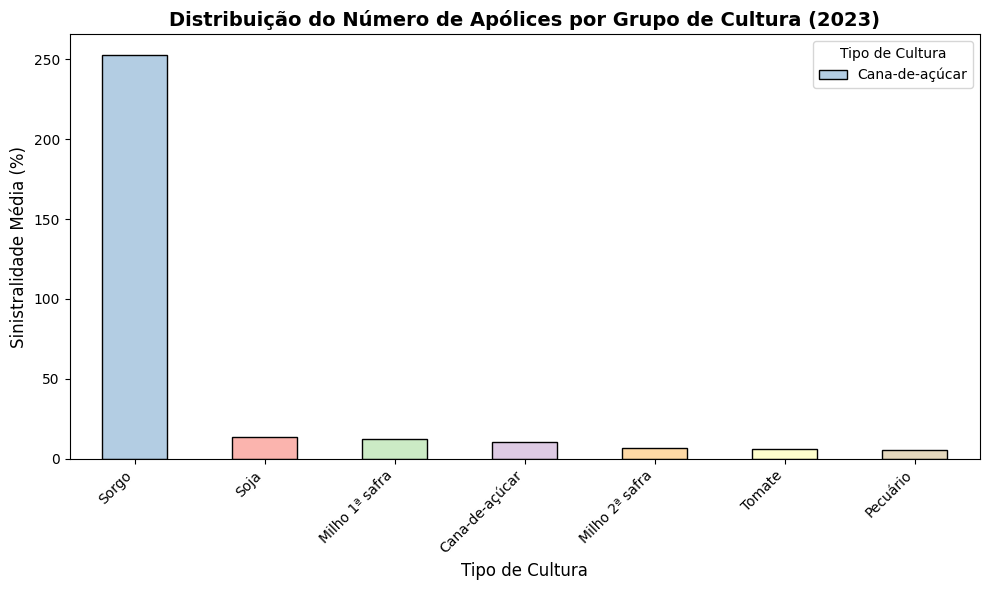

In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
from google.colab import files
uploaded = files.upload()

# Substitua 'nome_do_arquivo.csv' pelo nome correto do arquivo enviado
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Filtrar os dados para o estado de Goiás
goias_data = data[data['uf'] == 'GO']

# Converter as colunas necessárias para numérico (substituir vírgulas e converter)
goias_data['indenizacao'] = goias_data['indenizacao'].replace(',', '.', regex=True).astype(float)
goias_data['premio'] = goias_data['premio'].replace(',', '.', regex=True).astype(float)

# Calcular a sinistralidade como (indenização / prêmio) * 100
goias_data['sinistralidade'] = (goias_data['indenizacao'] / goias_data['premio']) * 100

# Agrupar por cultura e calcular a sinistralidade média
sinistrality_by_culture = goias_data.groupby('cultura')['sinistralidade'].mean()

# Paleta de cores semelhante à imagem
colors = ['#B3CDE3', '#FBB4AE', '#CCEBC5', '#DECBE4', '#FED9A6', '#FFFFCC', '#E5D8BD']

# Criar o gráfico
plt.figure(figsize=(10, 6))
bars = sinistrality_by_culture.sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')

# Adicionar título e rótulos
plt.title('Distribuição do Número de Apólices por Grupo de Cultura (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Cultura', fontsize=12)
plt.ylabel('Sinistralidade Média (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar legenda com cores
plt.legend(title='Tipo de Cultura', labels=sinistrality_by_culture.index, loc='best', fontsize=10)

# Ajustar layout
plt.tight_layout()
plt.show()



Saving seguro-rural-municipios-2023.xlsx - Sheet1.csv to seguro-rural-municipios-2023.xlsx - Sheet1 (2).csv


<ipython-input-7-947dd197fb9e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goias_data['indenizacao'] = goias_data['indenizacao'].replace(',', '.', regex=True).astype(float)
<ipython-input-7-947dd197fb9e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goias_data['premio'] = goias_data['premio'].replace(',', '.', regex=True).astype(float)
<ipython-input-7-947dd197fb9e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

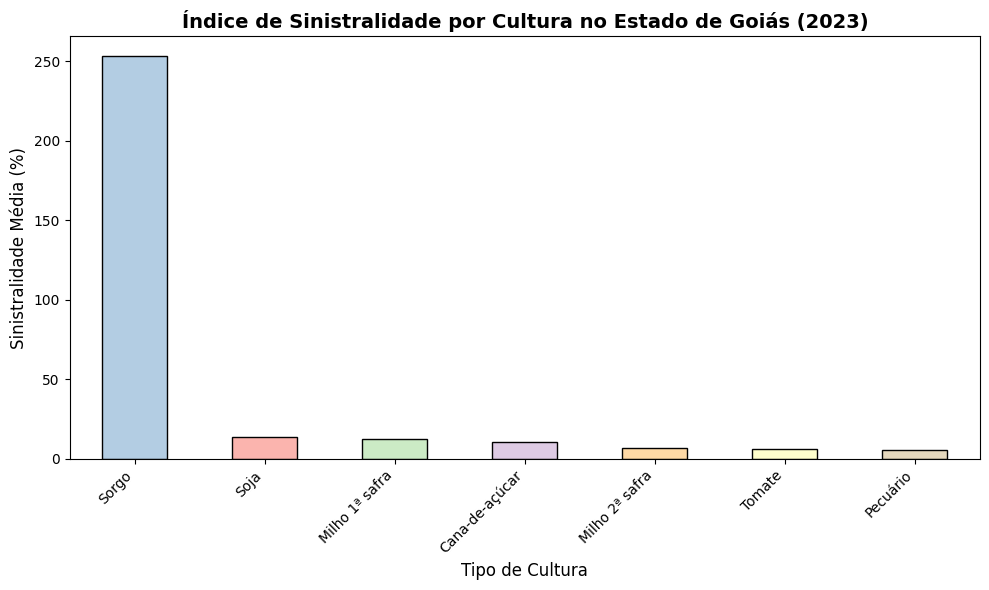

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
from google.colab import files
uploaded = files.upload()

# Substitua 'nome_do_arquivo.csv' pelo nome correto do arquivo enviado
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Filtrar os dados para o estado de Goiás
goias_data = data[data['uf'] == 'GO']

# Converter as colunas necessárias para numérico (substituir vírgulas e converter)
goias_data['indenizacao'] = goias_data['indenizacao'].replace(',', '.', regex=True).astype(float)
goias_data['premio'] = goias_data['premio'].replace(',', '.', regex=True).astype(float)

# Calcular o índice de sinistralidade como (indenização / prêmio) * 100
goias_data['sinistralidade'] = (goias_data['indenizacao'] / goias_data['premio']) * 100

# Agrupar por cultura e calcular a média do índice de sinistralidade
sinistrality_by_culture = goias_data.groupby('cultura')['sinistralidade'].mean()

# Paleta de cores semelhante à formatação anterior
colors = ['#B3CDE3', '#FBB4AE', '#CCEBC5', '#DECBE4', '#FED9A6', '#FFFFCC', '#E5D8BD']

# Criar o gráfico
plt.figure(figsize=(10, 6))
bars = sinistrality_by_culture.sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')

# Adicionar título e rótulos
plt.title('Índice de Sinistralidade por Cultura no Estado de Goiás (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Cultura', fontsize=12)
plt.ylabel('Sinistralidade Média (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()
plt.show()


Saving seguro-rural-municipios-2023.xlsx - Sheet1.csv to seguro-rural-municipios-2023.xlsx - Sheet1 (4).csv


<ipython-input-10-64c5bc7ff3ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goias_data['indenizacao'] = goias_data['indenizacao'].replace(',', '.', regex=True).astype(float)
<ipython-input-10-64c5bc7ff3ab>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goias_data['premio'] = goias_data['premio'].replace(',', '.', regex=True).astype(float)
<ipython-input-10-64c5bc7ff3ab>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

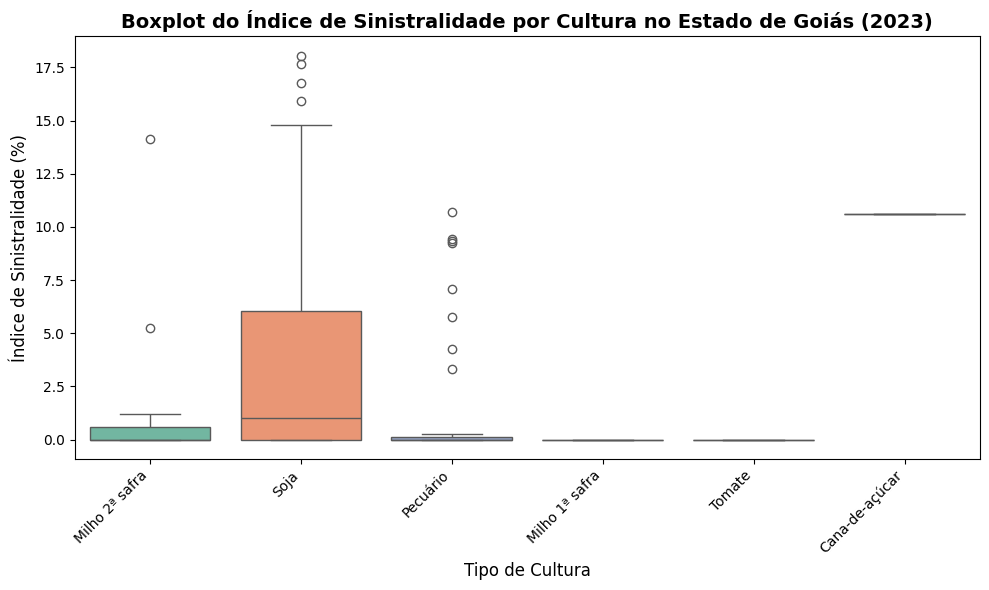

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fazer upload do arquivo novamente
from google.colab import files
uploaded = files.upload()

# Substitua pelo nome do arquivo carregado
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Filtrar os dados para o estado de Goiás
goias_data = data[data['uf'] == 'GO']

# Converter as colunas necessárias para numérico (substituir vírgulas e converter)
goias_data['indenizacao'] = goias_data['indenizacao'].replace(',', '.', regex=True).astype(float)
goias_data['premio'] = goias_data['premio'].replace(',', '.', regex=True).astype(float)

# Calcular o índice de sinistralidade como (indenização / prêmio) * 100
goias_data['sinistralidade'] = (goias_data['indenizacao'] / goias_data['premio']) * 100

# Remover outliers extremos usando o método IQR
Q1 = goias_data['sinistralidade'].quantile(0.25)
Q3 = goias_data['sinistralidade'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar os dados para remover outliers extremos
filtered_data = goias_data[(goias_data['sinistralidade'] >= lower_bound) & (goias_data['sinistralidade'] <= upper_bound)]

# Criar um boxplot do índice de sinistralidade por cultura
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='cultura', y='sinistralidade', palette='Set2')

# Adicionar título e rótulos
plt.title('Boxplot do Índice de Sinistralidade por Cultura no Estado de Goiás (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Cultura', fontsize=12)
plt.ylabel('Índice de Sinistralidade (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()
plt.show()



In [ ]:
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,10001010052117,4102802,Bela Vista do Paraíso,PR,Newe Seguros S.A,custeio,Milho 2ª safra,grãos,43.89,0,181,4132.20,2892.60,0.70,158695.27,28004.01,0.18,11201.60,0.00,nenhum,0,0.00
1,3354004281301,4127700,Toledo,PR,Mapfre Seguros Gerais S.A.,produtividade,Milho 2ª safra,grãos,113.00,0,256,4987.80,3241.80,0.65,457942.39,87341.15,0.19,34936.46,0.00,nenhum,0,0.00
2,3717,0,São Francisco do Guaporé,RO,Aliança do Brasil Seguros S/A.,custeio,Milho 2ª safra,grãos,49.00,0,365,5447.00,3540.55,0.65,390390.00,25088.73,0.06,10035.49,0.00,seca,1,0.00
3,1000300003193,3530805,Mogi Mirim,SP,FairFax Brasil Seguros Corporativos S/A,produtividade,Pecuário,perenes,0.00,53,365,0.00,0.00,0.00,1448700.00,86922.00,0.06,34768.80,0.00,nenhum,0,0.00
4,02010125629,5219308,Santa Helena de Goiás,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,40.00,0,281,4326.00,2812.00,0.65,160000.00,24746.67,0.15,9898.66,0.00,nenhum,0,0.00


          apolice      mun                  nome_mun estado  \
0  10001010052117  4102802     Bela Vista do Paraíso     PR   
1   3354004281301  4127700                    Toledo     PR   
2            3717        0  São Francisco do Guaporé     RO   
3   1000300003193  3530805                Mogi Mirim     SP   
4     02010125629  5219308     Santa Helena de Goiás     GO   

                                 seguradora           tipo         cultura  \
0                          Newe Seguros S.A        custeio  Milho 2ª safra   
1                Mapfre Seguros Gerais S.A.  produtividade  Milho 2ª safra   
2            Aliança do Brasil Seguros S/A.        custeio  Milho 2ª safra   
3   FairFax Brasil Seguros Corporativos S/A  produtividade        Pecuário   
4  Swiss Re Corporate Solutions Brasil S.A.  produtividade  Milho 2ª safra   

  tipo_cultura   area  animal  duracao  prod_est  prod_seg  nivel_cob  \
0        grãos  43.89       0      181   4132.20   2892.60       0.70   
1     

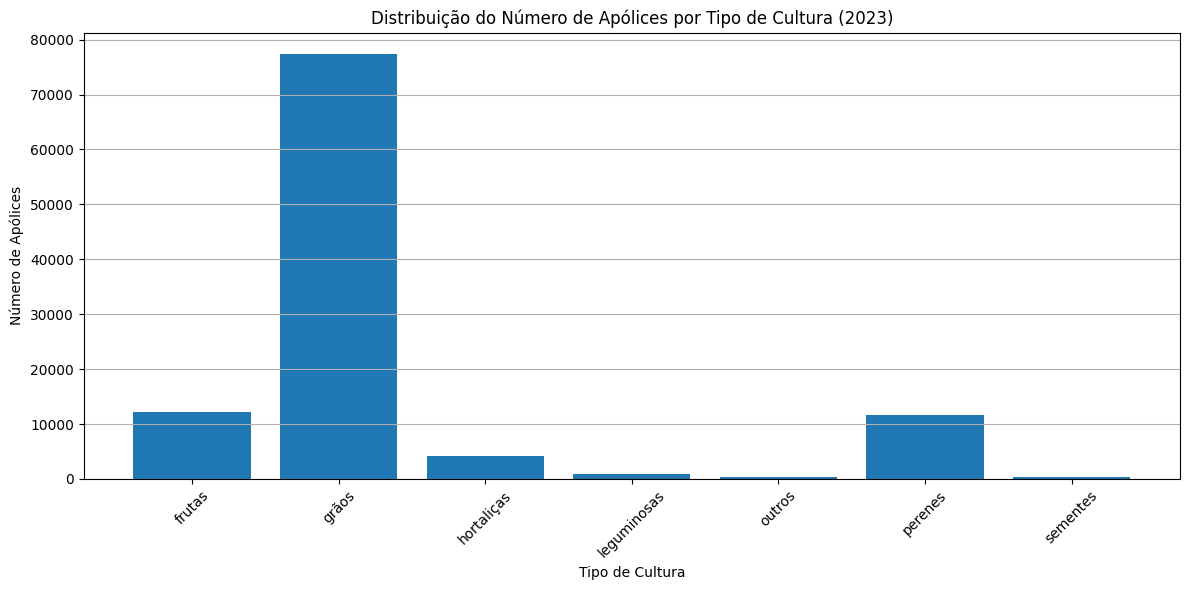

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Exibir as primeiras linhas do DataFrame para verificar os nomes das colunas
print(df.head())

# Renomear as colunas, se necessário, para garantir que estejam corretas
df.rename(columns={'Ano': 'ano', 'Tipo de Cultura': 'tipo_cultura', 'Número de Apólices': 'num_apolices', 'uf': 'estado'}, inplace=True)

# Verificar quais colunas estão disponíveis no DataFrame
print(df.columns)

# Agrupar os dados por estado e tipo de cultura para ver a distribuição
df_grouped = df.groupby(['tipo_cultura'])['apolice'].count().reset_index(name='num_apolices')

# Plotando a distribuição do número de apólices por tipo de cultura
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['tipo_cultura'], df_grouped['num_apolices'])

plt.title('Distribuição do Número de Apólices por Tipo de Cultura (2023)')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Número de Apólices')
plt.xticks(rotation=45)
plt.grid(axis='y', visible=True)
plt.tight_layout()
plt.show()



# Seleção de apólices de um estado do Brasil

In [ ]:
df['uf'].value_counts()

,count
uf,
PR,36754
RS,22095
SP,14912
SC,8717
MG,8170
GO,5892
MS,5481
MT,1545
ES,1356


In [ ]:
# visualizar os valores únicos da variável 'uf'
df['uf'].unique()

array(['PR', 'RO', 'SP', 'GO', 'MG', 'MT', 'RS', 'MS', 'BA', 'TO', 'MA',
       'PA', 'SE', 'RJ', 'RN', 'RR', 'SC', 'ES', 'PE', 'AL', 'PB', 'CE',
       'PI', 'DF', 0, 'AM', 'AC', 'AP'], dtype=object)

In [ ]:
# escolher um dos estados e selecionar apólices apenas desse estado
# aqui estou apenas visualizando sem salvar
df[df['uf'] == 'GO']

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
4,02010125629,5219308,Santa Helena de Goiás,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,40.00,0,281,4326.00,2812.00,0.65,160000.00,24746.67,0.15,9898.66,0.00,nenhum,0,0.00
8,3716,5204409,Caiapônia,GO,Aliança do Brasil Seguros S/A.,custeio,Soja,grãos,121.00,0,365,3745.00,2621.50,0.70,1212048.65,44215.93,0.04,8843.18,0.00,nenhum,0,0.00
9,02010125625,5219308,Santa Helena de Goiás,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,100.00,0,299,4326.00,2812.00,0.65,420000.00,64960.00,0.15,25983.99,0.00,nenhum,0,0.00
26,02010125621,5218805,Rio Verde,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,26.33,0,303,5538.00,3600.00,0.65,110526.00,11831.31,0.11,4732.51,0.00,nenhum,0,0.00
33,02010125605,5219712,Santo Antônio da Barra,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,93.47,0,289,4703.00,3057.00,0.65,392574.00,41874.56,0.11,16749.81,0.00,nenhum,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106815,270333,5218805,Rio Verde,GO,BRASILSEG COMPANHIA DE SEGUROS,custeio,Cana-de-açúcar,perenes,77.00,0,365,90.00,58.50,0.65,571145.89,12540.37,0.02,5016.14,0.00,seca,1,0.00
106819,5177202379010006406,5209952,Indiara,GO,Allianz Seguros S.A,produtividade,Soja,grãos,152.50,0,252,3511.52,2282.49,0.65,783179.00,45546.77,0.06,9109.34,0.00,geada,1,0.00
106850,5177202379010006373,5205471,Chapadão do Céu,GO,Allianz Seguros S.A,produtividade,Soja,grãos,20.00,0,200,4089.46,2658.15,0.65,119616.80,7334.53,0.06,1466.90,0.00,nenhum,0,0.00
106875,5177202379010006503,5219308,Santa Helena de Goiás,GO,Allianz Seguros S.A,produtividade,Soja,grãos,44.00,0,200,3969.14,2579.94,0.65,255414.28,17206.15,0.07,3441.22,0.00,nenhum,0,0.00


In [ ]:
# salvar essas informações num dataframe
df = df[df['uf'] == 'GO']
df = df.reset_index(drop=True) # iniciar os índices em 0
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,02010125629,5219308,Santa Helena de Goiás,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,40.00,0,281,4326.00,2812.00,0.65,160000.00,24746.67,0.15,9898.66,0.00,nenhum,0,0.00
1,3716,5204409,Caiapônia,GO,Aliança do Brasil Seguros S/A.,custeio,Soja,grãos,121.00,0,365,3745.00,2621.50,0.70,1212048.65,44215.93,0.04,8843.18,0.00,nenhum,0,0.00
2,02010125625,5219308,Santa Helena de Goiás,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,100.00,0,299,4326.00,2812.00,0.65,420000.00,64960.00,0.15,25983.99,0.00,nenhum,0,0.00
3,02010125621,5218805,Rio Verde,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,26.33,0,303,5538.00,3600.00,0.65,110526.00,11831.31,0.11,4732.51,0.00,nenhum,0,0.00
4,02010125605,5219712,Santo Antônio da Barra,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,93.47,0,289,4703.00,3057.00,0.65,392574.00,41874.56,0.11,16749.81,0.00,nenhum,0,0.00


In [ ]:
# quantas linhas e colunas há no novo dataframe
df.shape

(5892, 22)

# Análise descritiva

In [ ]:
# quantas apólices há de cada município - as 10 primeiras
df['nome_mun'].value_counts().head(10)

,count
nome_mun,
Rio Verde,477
Santa Helena de Goiás,241
Itumbiara,187
Goiatuba,184
Jataí,178
Paraúna,159
Palmeiras de Goiás,144
Cristalina,131
Morrinhos,131


In [ ]:
# há informações sobre apólices de quantos municípios no estado?
len(df['nome_mun'].unique())

222

In [ ]:
# resumo estatístico das variáveis numéricas
df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].describe()

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
count,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00,5892.00
mean,126.13,0.34,328.73,4034.84,2851.39,0.64,867902.01,53867.35,0.07,13368.95,3611.92,0.27,0.23
std,126.96,11.27,68.11,5815.10,5228.81,0.18,878339.09,52758.23,0.03,12624.32,24025.26,0.45,4.21
min,0.00,0.00,60.00,0.00,0.00,0.00,7500.00,312.75,0.00,125.10,0.00,0.00,0.00
25%,43.00,0.00,321.00,3442.31,2369.97,0.65,285965.66,17799.83,0.05,4457.21,0.00,0.00,0.00
50%,89.00,0.00,366.00,3652.00,2556.40,0.70,597122.79,37385.09,0.06,9146.49,0.00,0.00,0.00
75%,170.04,0.00,366.00,4033.80,2739.00,0.70,1139906.83,73312.09,0.08,18063.26,0.00,1.00,0.00
max,1727.00,800.00,731.00,113330.43,101997.39,1.00,11652744.20,629501.94,0.43,60000.00,719259.71,1.00,241.97


In [ ]:
df['premio'].quantile(0.99)

257013.09570000006

O *describe* traz um resumo estatístico dos dados. Para os dados de GO em 2023:

1 - Interpretação do resumo estatístico dos dados para Goiás (GO):

Para a variável 'prêmio', temos os seguintes insights:

O valor mínimo de prêmio em GO foi de 312,75 reais, indicando que uma das apólices apresentou esse valor como prêmio.
O valor máximo foi de 629.501,94 reais, o que representa o maior prêmio registrado em uma apólice em GO.
O primeiro quartil (Q1) foi de 17.799,83 reais, significando que um quarto das apólices em GO tinham prêmios abaixo desse valor.
A mediana, ou segundo quartil (Q2), foi de 37.835,09 reais. Isso implica que metade das apólices de GO possuíam valores de prêmio abaixo desse valor, e metade possuíam valores acima.
O terceiro quartil (Q3) foi de 73.312,09 reais, ou seja, um quarto das apólices em GO tinham prêmios acima desse valor.
A média de prêmio foi de 53.867,35 reais, que é significativamente maior do que a mediana de 37.835,09 reais. Isso sugere a presença de alguns prêmios com valores muito altos, que puxaram a média para cima.
Para outras variáveis, uma análise semelhante pode ser feita. Abaixo, alguns pontos de destaque relevantes para a pesquisa:

O valor de subvenção varia entre 125,10 reais e 60.000,00 reais, indicando uma grande amplitude. Esse intervalo amplo pode indicar que o valor da subvenção possui variação significativa, talvez de acordo com o tipo de seguro ou cobertura.
A variável área também possui uma amplitude significativa, variando de 0 a 17.727,00, o que mostra a grande diversidade de áreas seguradas.
A taxa possui valores bastante baixos, com uma média de 0,07 e um máximo de 0,43, indicando taxas geralmente baixas em comparação com outros estados, o que pode estar relacionado a políticas de incentivo ou características do seguro na região.
A variável sinistralidade apresenta uma média baixa de 0,23, com valores máximos de até 241,97, indicando que, embora a maioria dos sinistros seja de valor baixo, há eventos isolados de sinistralidade elevada.
Outra variável que poderia ser interessante analisar seria a área das propriedades seguradas.

É possível identificar pontos de interesse nos dados. Veja abaixo:

In [ ]:
# menor valor de prêmio
df[df['premio'] == df['premio'].min()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
3537,1000300003791,5220207,São Miguel do Araguaia,GO,FairFax Brasil Seguros Corporativos S/A,produtividade,Pecuário,perenes,0.00,1,366,0.00,0.00,0.00,7500.00,312.75,0.04,125.10,0.00,nenhum,0,0.00


Interpretação: O menor valor de prêmio em GO foi no município de São Miguel do Araguaia (prêmio de 312,75 reais, com subvenção de 125,10 reais). A apólice se refere a Pecuária

In [ ]:
# maior valor de prêmio
df[df['premio'] == df['premio'].max()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
7976,1460000000207,3170206,Uberlândia,MG,Mapfre Seguros Gerais S.A.,custeio,Floresta,outros,536907.00,0,365,0.00,0.00,0.00,30000000.00,1548292.53,0.05,60000.00,0.00,nenhum,0,0.00


In [ ]:
# um valor específico de indenização
df[df['indenizacao'] == 663744.00]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade


## Gráficos

In [ ]:
# as dez culturas com mais apólices de seguro no estado em 2021
df['cultura'].value_counts().head(10)

,count
cultura,
Soja,3813
Milho 2ª safra,1242
Pecuário,401
Sorgo,274
Cana-de-açúcar,49
Milho 1ª safra,49
Tomate,38
Feijão 1ª safra,11
Trigo,5


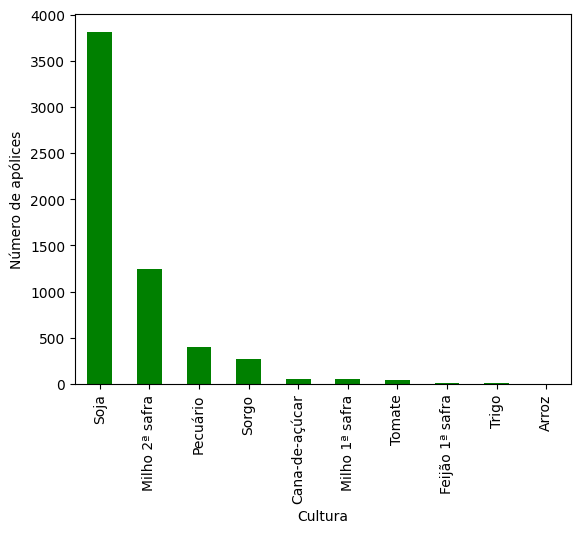

In [ ]:
# gráfico de colunas - 10 culturas com mais apólices no estado
ax = df['cultura'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='', color='green')
ax.set_xlabel('Cultura')
ax.set_ylabel('Número de apólices');

**2 - Interpretação do gráfico de colunas com as dez culturas mais seguradas:**

As dez principais culturas seguradas de MG em 2023 foram, nessa ordem:
- Soja (com mais de 3,5 mil apólices)
- Milho 2ª safra (com quase 1,5 mil apólices)
- Pecuário (com cerca de 500 apólices)
- Sorgo (com cerca de 400 apólices)
- Cana-de-açúcar
- Milho 1ª Safra
- Tomate
- Feijão 1ª safra
- Trigo
- Arroz

Milho e soja concentram as apólices de seguro do estado. As outras não chegam a mil apólices.

Realizar a soma das variáveis de forma separada por cultura para o estado todo:

In [ ]:
# total para todas as culturas
df_todas = df.groupby(by=['cultura']).sum(numeric_only=True)
# mostrar apenas as variáveis de interesse
df_todas.loc[:, ['area', 'animal', 'prod_est', 'prod_seg',
       'total_seg', 'premio', 'subvencao', 'indenizacao', 'sinistro']]

,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,sinistro
cultura,,,,,,,,,
Alface,13.47,0,40000.00,40000.00,282870.00,8854.60,3541.84,0.00,0
Arroz,392.00,0,15750.00,10675.00,5453410.29,321050.34,79854.90,0.00,0
Café,110.00,0,5731.00,3725.15,1745017.68,115124.26,46049.69,41981.79,1
Cana-de-açúcar,9239.35,0,21873.00,20453.65,50124250.80,1156325.50,462529.99,21281.23,12
Feijão 1ª safra,881.00,0,20445.00,13289.25,7196750.55,459054.79,166001.80,26321.40,5
Floresta,77.11,0,0.00,0.00,977071.73,25923.06,10369.22,0.00,0
Girassol,163.03,0,2673.60,1871.40,441172.10,32816.20,13126.48,0.00,0
Milho 1ª safra,4187.06,0,348397.80,243899.80,35703023.57,2142577.37,743839.69,58037.07,18
Milho 2ª safra,135505.79,0,6445003.72,4294698.99,696948860.66,72205365.45,28127211.80,4355437.29,322


In [ ]:
# realizar a soma apenas para as 10 culturas com mais apólices do estado

# descobrindo as 10 culturas com mais apólices
df_cult = pd.DataFrame(df['cultura'].value_counts().head(10)).reset_index()
df_cult.columns = ['cultura', 'apolices']
# pegar as linhas no df que correspondam a apólices dessas culturas
df1 = df.merge(df_cult, how='inner')
# realizar a soma das variáveis apenas para essas culturas
df2 = df1.groupby(by=['cultura']).sum(numeric_only=True)
# mostrar apenas as variáveis de interesse
df2.loc[:, ['area', 'animal', 'prod_est', 'prod_seg',
       'total_seg', 'premio', 'subvencao', 'indenizacao', 'sinistro']]

,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,sinistro
cultura,,,,,,,,,
Arroz,392.00,0,15750.00,10675.00,5453410.29,321050.34,79854.90,0.00,0
Cana-de-açúcar,9239.35,0,21873.00,20453.65,50124250.80,1156325.50,462529.99,21281.23,12
Feijão 1ª safra,881.00,0,20445.00,13289.25,7196750.55,459054.79,166001.80,26321.40,5
Milho 1ª safra,4187.06,0,348397.80,243899.80,35703023.57,2142577.37,743839.69,58037.07,18
Milho 2ª safra,135505.79,0,6445003.72,4294698.99,696948860.66,72205365.45,28127211.80,4355437.29,322
Pecuário,0.00,2016,0.00,0.00,289452124.86,4337261.85,1737054.43,1205012.81,101
Soja,561868.89,0,13592683.54,9446234.15,3880804886.52,228270782.12,44055892.06,14931254.49,1061
Sorgo,29258.93,0,918627.97,602902.47,90159536.01,6585420.55,2634022.39,536122.23,76
Tomate,846.00,0,2349017.65,2113884.29,52395026.93,1608332.00,643332.80,70327.31,13


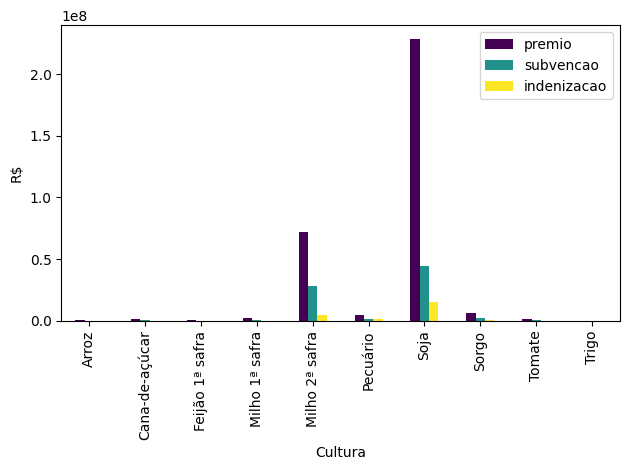

In [ ]:
# fazer um gráfico com os valores de prêmio, subvenção
# e indenização para as 10 culturas mais seguradas
# outras variáveis poderiam ser incluídas no gráfico
df2[['premio','subvencao','indenizacao']].plot.bar(colormap=plt.cm.viridis)
plt.xlabel('Cultura')
plt.ylabel('R$')
plt.tight_layout();

**3 - Interpretação do gráfico comparativo das somas dos valores de prêmio, subvenção e indenização das dez culturas mais seguradas:**

É possível ver que, para nenhuma das culturas, o valor total das indenizações superou o valor total dos prêmios. Isso é bom para as seguradoras, pois, se o contrário acontecesse, elas poderiam ter prejuízos.Porém a subvenção da Soja é muito semelhante com a do Milho, o que indica que mesmo tendo bem menos indenizações, o milho, o governa esta disposto a subsidiar parte do custo do seguro.

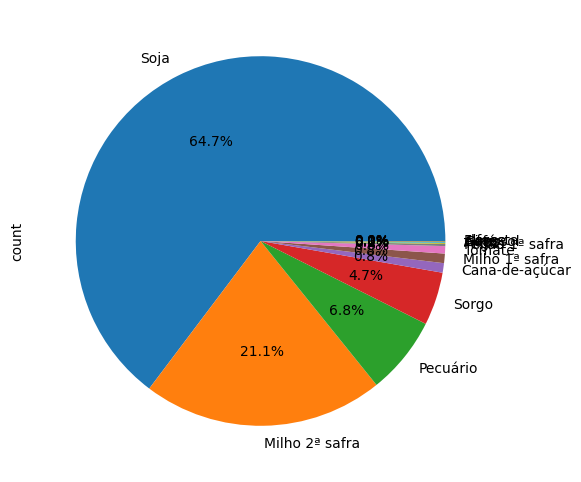

In [ ]:
# gráfico de pizza - todas as culturas no estado
plt.figure(figsize=(10,6))
df['cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%');

**4 - Interpretação do gráfico de pizza com a porcentagem das apólices de cada cultura:**

A soj representa mais de metade das apólices do estado de Goias e o Milho 1ª safra representa 21,1%. As outras possuem uma representatividade menor, sendo elas: pecuário com 6,8%, Sorgo, com 4,7% e as outras são bem menos expressivas.

In [ ]:
# número de apólices por tipo de cultura
df['tipo_cultura'].value_counts()

,count
tipo_cultura,
grãos,5388
perenes,452
hortaliças,39
leguminosas,11
outros,2


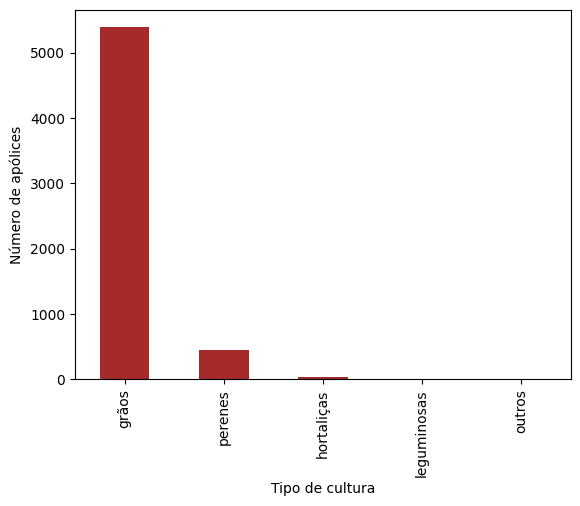

In [ ]:
# gráfico de colunas - tipos de cultura
ax = df['tipo_cultura'].value_counts().plot(kind='bar', color='brown')
ax.set_xlabel('Tipo de cultura')
ax.set_ylabel('Número de apólices');

As culturas de grãos (milho e soja) são responsáveis por mais de 5.000 apólices e os perenes por menos de 1.000 apólices em GO. As seguintes são: hortaliças, com 39; frutas; leguminosas e outros. Como já foi observado, em GO, milho, soja e pecuário foram os principais seguros feitos em MG em 2023.

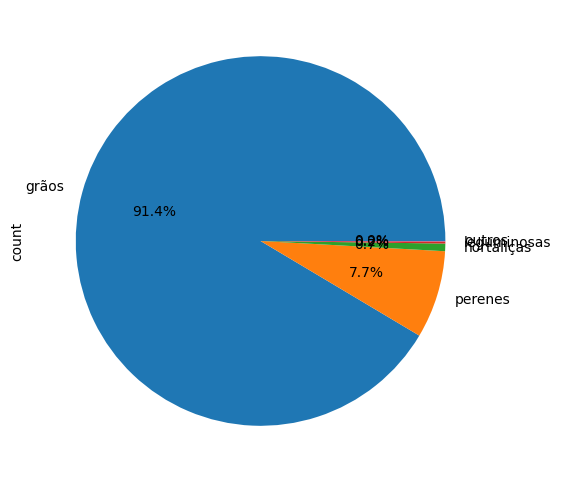

In [ ]:
# gráfico de pizza - tipos de cultura no estado
plt.figure(figsize=(10,6))
df['tipo_cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%');

**5 - Interpretação do gráfico de pizza com a porcentagem das apólices de cada tipo de cultura:**

É a mesma informação do gráfico anterior, porém, considerando a porcentagem das apólices dentro do total. As culturas grãos representam 91% das apólices e os perenes representam quase 8%. As outras juntas representam 0,9% das apólices.

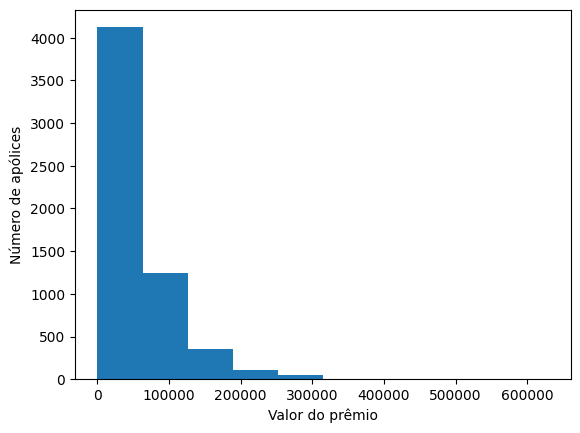

In [ ]:
# histograma dos valores de prêmio
# é possível alterar o número de colunas (bins)
ax = df['premio'].plot(kind='hist', bins=10)
ax.set_ylabel('Número de apólices')
ax.set_xlabel('Valor do prêmio');

**6 - Interpretação do histograma dos valores de prêmio**

No histograma dos valores de prêmio é possível notar que a maioria das apólices (cerca de 4.000) têm prêmios de até R$100.000,00 .

Poderíamos pedir para ver quais são as de valores altos de prêmio:

In [ ]:
df[df['premio'] > 200000]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
207,1000111023584,5206206,Cristalina,GO,Too Seguros S.A.,produtividade,Milho 2ª safra,grãos,692.00,0,180,5261.40,3420.00,0.65,3155520.00,280841.28,0.09,60000.00,0.00,nenhum,0,0.00
222,02010125601,5204409,Caiapônia,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,494.29,0,284,5419.00,3523.00,0.65,1977160.00,206942.74,0.10,59999.99,0.00,nenhum,0,0.00
321,1000111023910,5221502,Turvânia,GO,Too Seguros S.A.,produtividade,Milho 2ª safra,grãos,641.46,0,180,5077.20,3300.00,0.65,2822424.00,276597.58,0.10,60000.00,0.00,nenhum,0,0.00
475,1000111024180,5213756,Montividiu,GO,Too Seguros S.A.,produtividade,Milho 2ª safra,grãos,364.88,0,180,6042.60,4230.00,0.70,2057923.20,204763.39,0.10,60000.00,0.00,nenhum,0,0.00
738,4283,5202601,Aurilândia,GO,Aliança do Brasil Seguros S/A.,custeio,Milho 2ª safra,grãos,482.00,0,365,4362.00,2835.30,0.65,2980760.80,236574.79,0.08,60000.00,0.00,nenhum,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,300759,5207253,Doverlândia,GO,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,592.00,0,366,3651.00,2555.70,0.70,4493811.96,242763.53,0.05,48552.70,0.00,nenhum,0,0.00
5685,300852,5217203,Piranhas,GO,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,491.00,0,366,3299.00,2144.35,0.65,3332246.16,297125.28,0.09,59425.05,0.00,nenhum,0,0.00
5686,300841,5218805,Rio Verde,GO,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,447.00,0,366,3652.00,2556.40,0.70,3329017.81,205651.28,0.06,41130.25,0.00,nenhum,0,0.00
5692,7161000054201,5207253,Doverlândia,GO,Mapfre Seguros Gerais S.A.,produtividade,Soja,grãos,665.29,0,220,3499.80,2625.00,0.75,4074668.40,270752.42,0.07,54150.48,0.00,nenhum,0,0.00


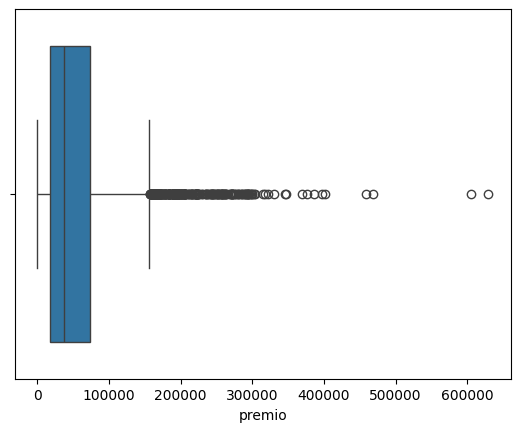

In [ ]:
# boxplot - premio
sns.boxplot(x=df['premio']);

**7 - Interpretação do boxplot dos valores de prêmio**

No boxplot da variável prêmio, é possível observar a distribuição dessa variável para Goiás. A "caixa" do gráfico representa o primeiro, segundo e terceiro quartis, que são, respectivamente, 17.799,83; 37.835,09; e 73.312,09 reais.

Os pontos à direita da caixa representam os outliers, ou seja, valores discrepantes de prêmio que se destacam significativamente acima da distribuição principal. Não há outliers à esquerda, pois não existem valores negativos para prêmios. Esses outliers mostram que há uma parcela de apólices com prêmios excepcionalmente altos, que puxam a média para cima e criam uma distribuição bastante assimétrica para essa variável em GO.

In [ ]:
# a informação presente no boxplot
df['premio'].describe()

,premio
count,5892.00
mean,53867.35
std,52758.23
min,312.75
25%,17799.83
50%,37385.09
75%,73312.09
max,629501.94


# Relação entre as variáveis

In [ ]:
# correlação entre as variáveis numéricas
df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].corr(numeric_only=True)

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
area,1.00,-0.03,-0.00,-0.02,-0.03,0.27,0.88,0.91,0.01,0.74,0.01,0.01,-0.04
animal,-0.03,1.00,0.03,-0.02,-0.02,-0.11,0.00,-0.01,-0.03,0.00,-0.00,0.01,0.00
duracao,-0.00,0.03,1.00,-0.08,-0.07,-0.08,0.14,0.04,-0.34,-0.10,0.04,0.02,0.02
prod_est,-0.02,-0.02,-0.08,1.00,1.00,0.26,0.03,0.04,0.07,0.11,-0.00,0.02,-0.02
prod_seg,-0.03,-0.02,-0.07,1.00,1.00,0.23,0.03,0.03,0.03,0.09,-0.00,0.02,-0.01
nivel_cob,0.27,-0.11,-0.08,0.26,0.23,1.00,0.08,0.24,0.36,0.19,0.00,0.02,-0.08
total_seg,0.88,0.00,0.14,0.03,0.03,0.08,1.00,0.88,-0.20,0.66,0.01,0.01,-0.04
premio,0.91,-0.01,0.04,0.04,0.03,0.24,0.88,1.00,0.13,0.85,0.01,0.01,-0.04
taxa,0.01,-0.03,-0.34,0.07,0.03,0.36,-0.20,0.13,1.00,0.33,0.01,-0.00,-0.03
subvencao,0.74,0.00,-0.10,0.11,0.09,0.19,0.66,0.85,0.33,1.00,-0.01,-0.00,-0.04


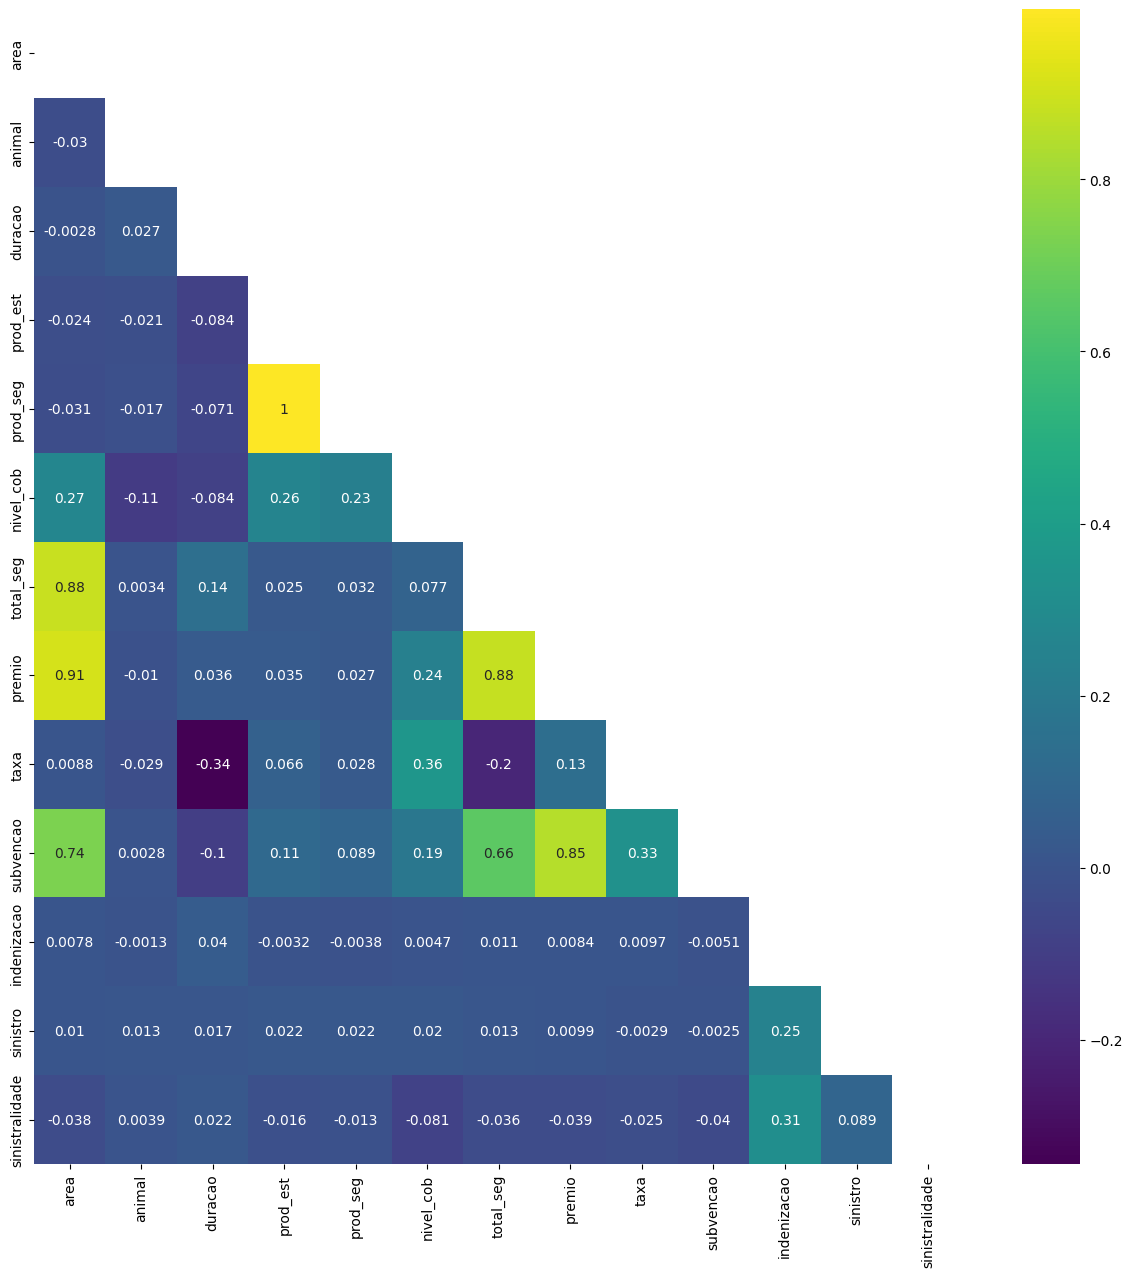

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))         # tamanho da figura
r = df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].corr(numeric_only=True)
mask = np.zeros_like(r)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(r, cmap='viridis', annot=True, mask=mask, ax=ax); # se tirar o 'mask' aparece a parte superior da matriz

**8 - Interpretação das correlações entre as variáveis:**

As maiores correlações positivas são:
- 0,91: Prêmio e área (correlação positiva quase perfeita. A medida que a área segurada aumenta, o valor do prêmio também tende a aumentar de maneira proporcional. Isso sugere uma relação direta: áreas maiores demandam prêmios mais altos, provavelmente porque representam um risco maior ou um montante maior a ser assegurado.)
- 0,88: Área e total_seg (A alta correlação positiva entre área e total segurado indica que, quanto maior a área segurada, maior o valor total segurado. Isso é esperado, já que o valor segurado é, em geral, proporcional ao tamanho da área, refletindo uma ligação direta entre o tamanho da cobertura e o valor segurado.)
- 0,88: Prêmio e total-seg (Também uma alta correlação positiva, mostrando que prêmios mais altos estão associados a valores totais segurados maiores. Isso sugere que quanto maior o valor segurado, maior é o prêmio pago. Essa correlação reflete a lógica de que, ao garantir um montante maior, o prêmio cobrado será mais alto para cobrir o risco. )
- 0,85: subvencao e prêmio (A subvenção e o prêmio têm uma alta correlação positiva, o que indica que seguros com prêmios mais elevados tendem a receber subvenções maiores. Isso pode refletir uma política de incentivo onde, quanto maior o risco segurado e o prêmio associado, maior é a subvenção, talvez para tornar o seguro acessível para propriedades que precisam de coberturas de maior valor.)

A maior correlação negativa é:
- -0,34: Taxa e duracao (A correlação negativa entre taxa e duração, embora não seja forte, sugere uma relação inversa leve. Uma interpretação possível é que, quando a duração do seguro é maior, a taxa aplicada tende a ser um pouco menor, possivelmente devido a uma diluição do risco ou a políticas que incentivam contratos de longo prazo com condições melhores. No entanto, essa relação não é intensa e pode indicar apenas uma tendência moderada.
 )

Lembrar que correlação não implica causalidade.

Diagramas de dispersão: vamos fazer alguns diagramas de dispersão para observar como os pares de variáveis se comportam.

Pares de variáveis que tiveram correlação alta:

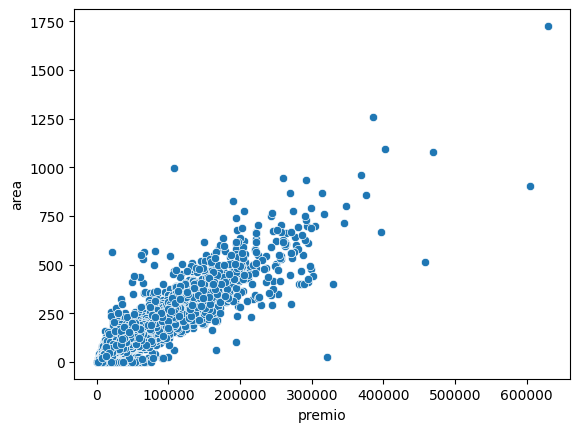

In [ ]:
# diagrama de dispersão entre Prêmio e área
ax = sns.scatterplot(x='premio',
                y='area',
                data=df)
ax.set_title('')
plt.show()

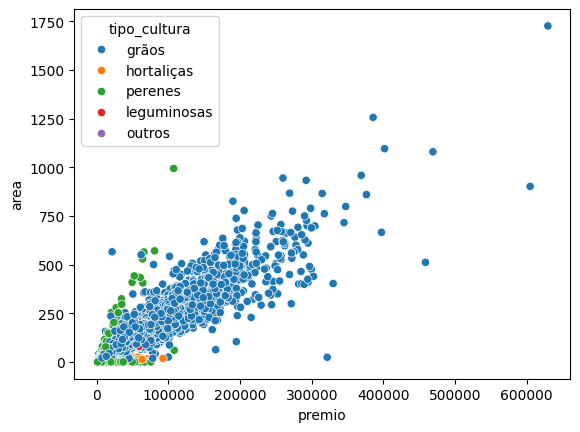

In [ ]:
# diagrama de dispersão entre Prêmio e área.
# tipo_cultura nas cores
ax = sns.scatterplot(x='premio',
                y='area',
                hue='tipo_cultura',
                data=df)
ax.set_title('')
plt.show()

In [ ]:
df[df['prod_est'] == df['prod_est'].max()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
5,1101.14.6830,5220603,Silvânia,GO,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,5.87,0,330,113330.43,101997.39,0.90,643093.51,18971.00,0.03,7588.40,0.00,nenhum,0,0.00


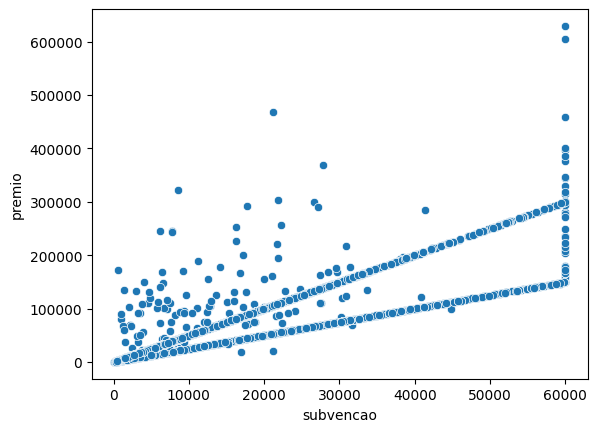

In [ ]:
# diagrama de dispersão entre subvenção e prêmio
ax = sns.scatterplot(x='subvencao',
                y='premio',
                data=df)
ax.set_title('')
plt.show()

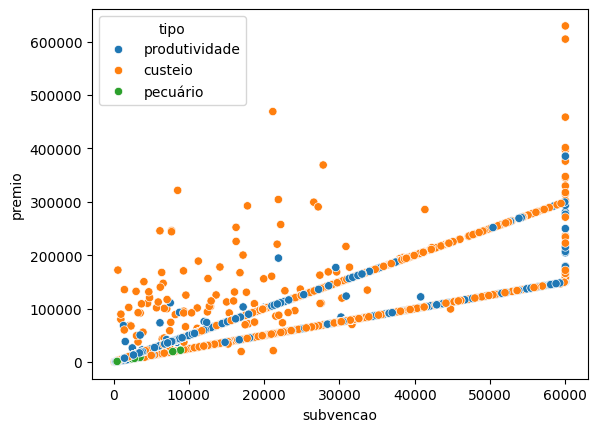

In [ ]:
# diagrama de dispersão entre subvenção e prêmio
# mais tipo de seguro nas cores
ax = sns.scatterplot(x='subvencao',
                y='premio',
                hue='tipo',
                data=df)
ax.set_title('')
plt.show()

Pares de variáveis que tiveram correlação baixa:

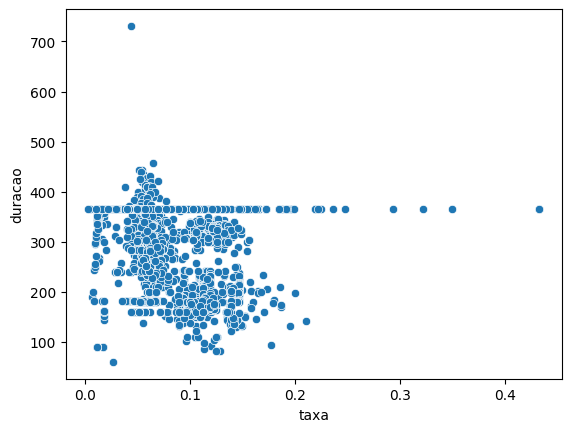

In [ ]:
ax = sns.scatterplot(x='taxa',
                y='duracao',
                data=df)
ax.set_title('')
plt.show()

<ipython-input-37-d000eca55d09>:29: UserWarning: The palette list has more values (20) than needed (7), which may not be intended.
  sns.histplot(data=df, x='tipo_cultura', bins=10, kde=False, hue='tipo_cultura', palette=custom_palette)


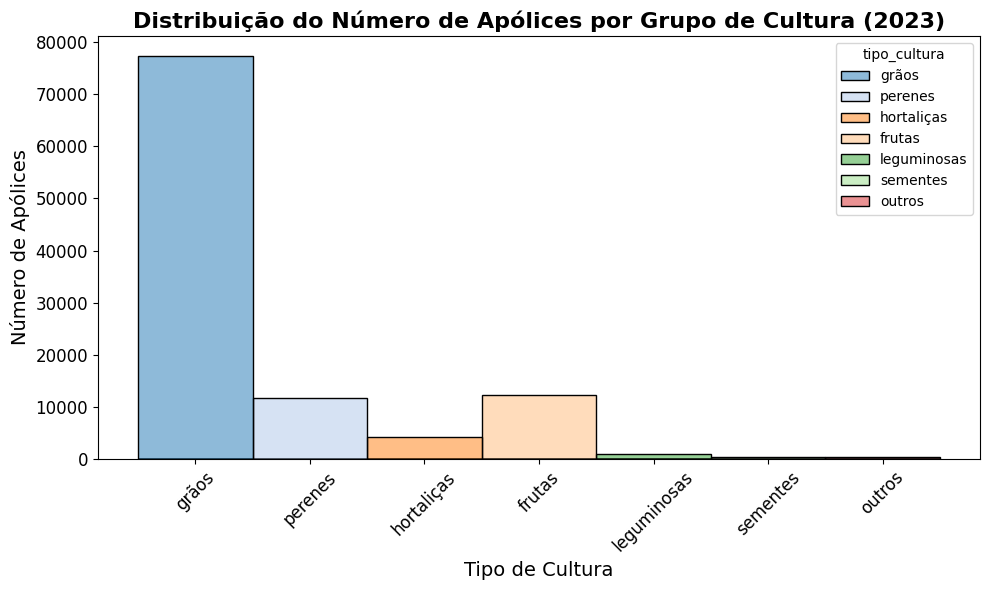

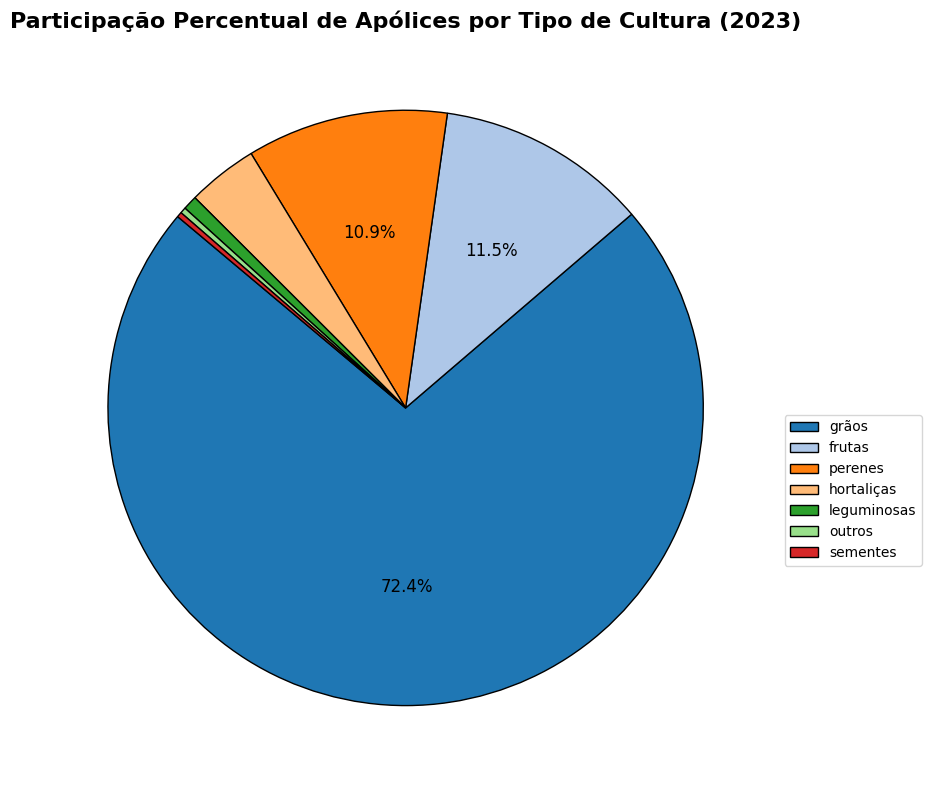

<ipython-input-37-d000eca55d09>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tipo_cultura', y='sinistralidade', palette=custom_palette)
<ipython-input-37-d000eca55d09>:43: UserWarning: The palette list has more values (20) than needed (7), which may not be intended.
  sns.boxplot(data=df, x='tipo_cultura', y='sinistralidade', palette=custom_palette)


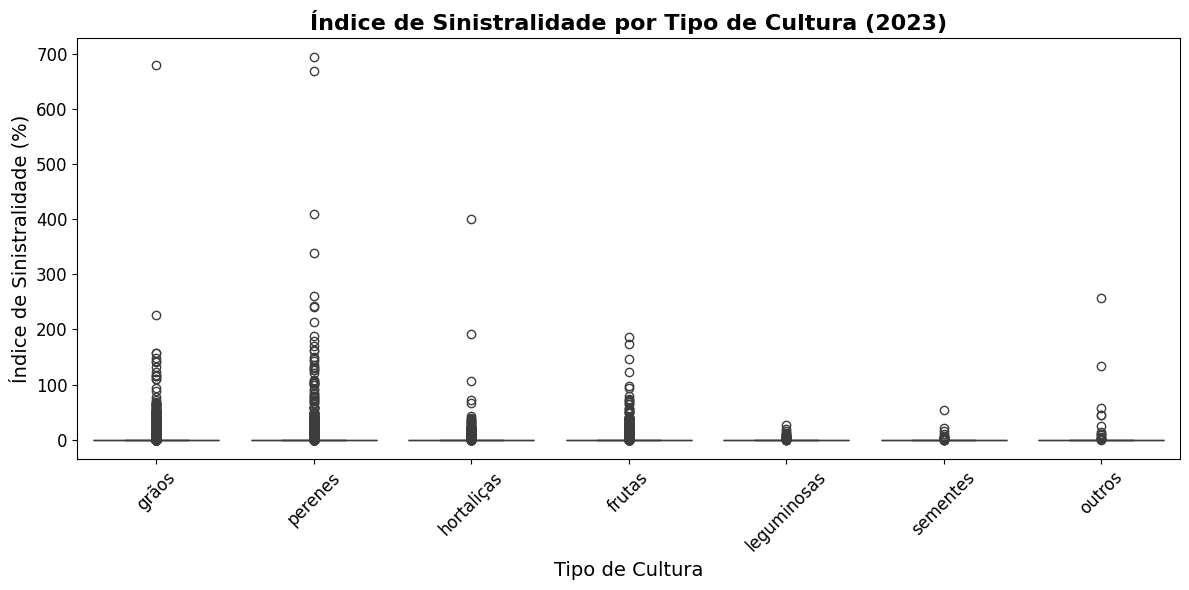

<ipython-input-37-d000eca55d09>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='tipo_cultura', y='subvencao', palette=custom_palette)
<ipython-input-37-d000eca55d09>:50: UserWarning: The palette list has more values (20) than needed (7), which may not be intended.
  sns.barplot(data=df_grouped, x='tipo_cultura', y='subvencao', palette=custom_palette)


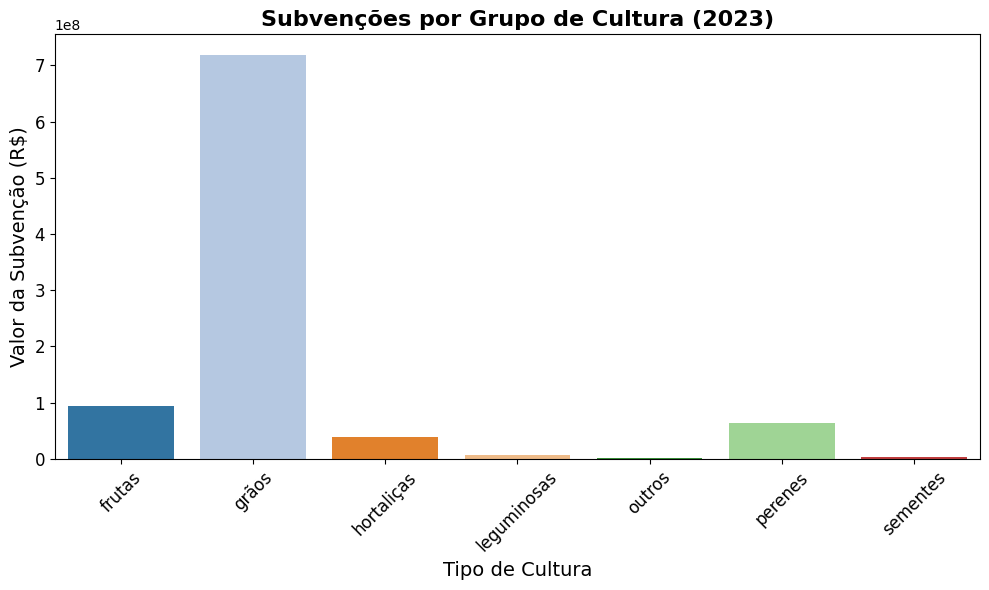

<ipython-input-37-d000eca55d09>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seguradora_counts, x='seguradora', y='num_apolices', palette=custom_palette)
<ipython-input-37-d000eca55d09>:58: UserWarning: The palette list has more values (20) than needed (13), which may not be intended.
  sns.barplot(data=seguradora_counts, x='seguradora', y='num_apolices', palette=custom_palette)


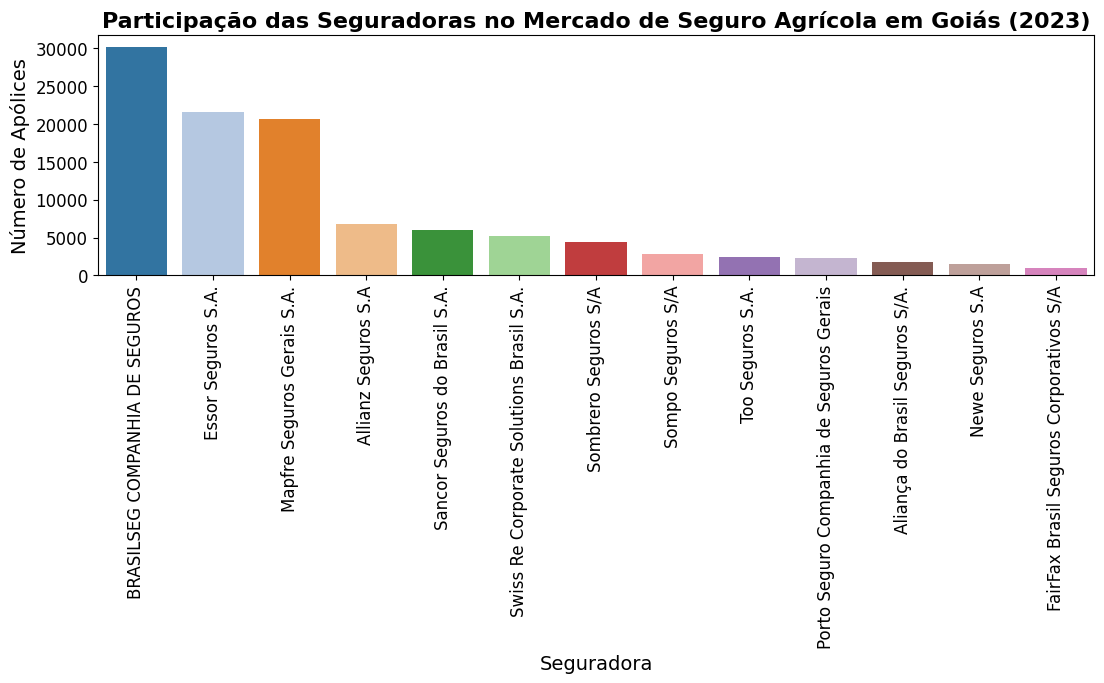

<ipython-input-37-d000eca55d09>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tipo_cultura', y='indenizacao', palette=custom_palette)
<ipython-input-37-d000eca55d09>:65: UserWarning: The palette list has more values (20) than needed (7), which may not be intended.
  sns.boxplot(data=df, x='tipo_cultura', y='indenizacao', palette=custom_palette)


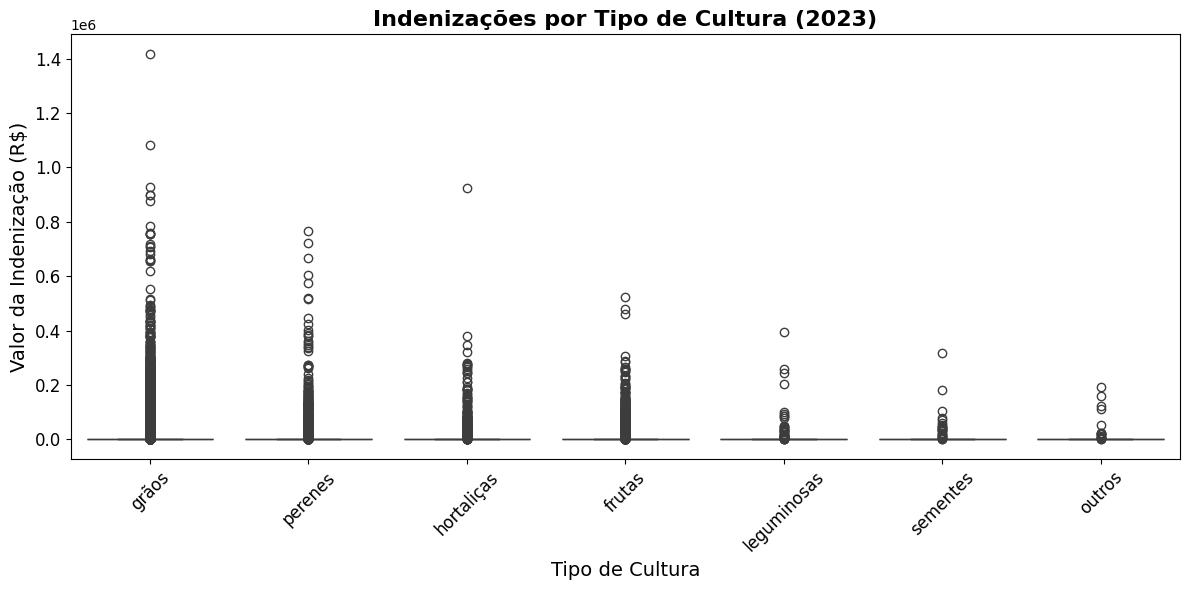

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo personalizado para padronização dos gráficos
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
custom_palette = sns.color_palette('tab20')

# Certificar-se de que os dados estejam organizados e verificar as primeiras linhas
df.head()

# Função para formatar todos os gráficos de maneira consistente
def custom_format(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='x', labelrotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    plt.tight_layout()


# Gráfico 1: Histograma da Distribuição de Apólices por Grupo de Cultura
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tipo_cultura', bins=10, kde=False, hue='tipo_cultura', palette=custom_palette)
custom_format(plt.gca(), 'Distribuição do Número de Apólices por Grupo de Cultura (2023)', 'Tipo de Cultura', 'Número de Apólices')
plt.show()
# Gráfico 2: Gráfico de Pizza para a Participação Percentual de Apólices por Tipo de Cultura
plt.figure(figsize=(10, 8))
tipo_cultura_counts = df['tipo_cultura'].value_counts()
plt.pie(tipo_cultura_counts, labels=None, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=140, colors=custom_palette, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Participação Percentual de Apólices por Tipo de Cultura (2023)', fontsize=16, fontweight='bold')
plt.legend(labels=tipo_cultura_counts.index, loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico 3: Boxplot dos Índices de Sinistralidade por Tipo de Cultura
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tipo_cultura', y='sinistralidade', palette=custom_palette)
custom_format(plt.gca(), 'Índice de Sinistralidade por Tipo de Cultura (2023)', 'Tipo de Cultura', 'Índice de Sinistralidade (%)')
plt.show()

# Gráfico 4: Gráfico de Barras das Subvenções por Grupo de Cultura
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('tipo_cultura')['subvencao'].sum().reset_index()
sns.barplot(data=df_grouped, x='tipo_cultura', y='subvencao', palette=custom_palette)
custom_format(plt.gca(), 'Subvenções por Grupo de Cultura (2023)', 'Tipo de Cultura', 'Valor da Subvenção (R$)')
plt.show()

# Gráfico 5: Gráfico de Barras para a Participação das Seguradoras
plt.figure(figsize=(12, 6))
seguradora_counts = df['seguradora'].value_counts().reset_index()
seguradora_counts.columns = ['seguradora', 'num_apolices']
sns.barplot(data=seguradora_counts, x='seguradora', y='num_apolices', palette=custom_palette)
custom_format(plt.gca(), 'Participação das Seguradoras no Mercado de Seguro Agrícola em Goiás (2023)', 'Seguradora', 'Número de Apólices')
plt.xticks(rotation=90)
plt.show()

# Gráfico 6: Boxplot das Indenizações por Tipo de Cultura
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tipo_cultura', y='indenizacao', palette=custom_palette)
custom_format(plt.gca(), 'Indenizações por Tipo de Cultura (2023)', 'Tipo de Cultura', 'Valor da Indenização (R$)')
plt.show()


